In [14]:
# Importing the libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import plotly.express as px
%matplotlib inline

In [15]:
# Reading the data

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df = pd.read_csv("data.csv")
df.head(10)
# df = df[2500:7500]
# df.head()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,NumQueryComponents,NumAmpersand,NumHash,NumNumericChars,NoHttps,RandomString,IpAddress,DomainInSubdomains,DomainInPaths,HttpsInHostname,HostnameLength,PathLength,QueryLength,DoubleSlashInPath,NumSensitiveWords,EmbeddedBrandName,PctExtHyperlinks,PctExtResourceUrls,ExtFavicon,InsecureForms,RelativeFormAction,ExtFormAction,AbnormalFormAction,PctNullSelfRedirectHyperlinks,FrequentDomainNameMismatch,FakeLinkInStatusBar,RightClickDisabled,PopUpWindow,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,1,3,1,5,72,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,21,44,0,0,0,0,0.000000,0.250000,1,1,0,0,0,0.000,0,0,0,0,0,0,0,1,1,0,1,1,-1,1,1
1,2,3,1,3,144,0,0,0,0,2,0,2,1,0,41,1,0,0,0,0,0,17,16,103,0,1,0,0.000000,0.000000,0,1,0,0,0,0.000,0,0,0,0,0,0,0,0,1,-1,1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,27,24,0,0,0,0,0.375000,1.000000,1,1,0,0,0,0.000,0,0,0,0,0,0,0,0,1,0,-1,1,-1,0,1
3,4,3,1,6,79,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,22,50,0,0,0,1,1.000000,0.095238,1,1,0,0,0,0.000,1,0,0,0,1,0,0,0,1,-1,1,1,1,-1,1
4,5,3,0,4,46,0,0,0,0,0,0,0,0,0,2,1,1,0,0,1,0,10,29,0,0,0,0,1.000000,1.000000,0,0,0,1,0,0.000,1,0,0,0,0,1,0,0,1,1,-1,0,-1,-1,1
5,6,3,1,1,42,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,23,12,0,0,0,0,0.100000,1.000000,1,1,0,0,0,0.000,0,0,0,0,0,1,1,0,1,1,1,1,-1,1,1
6,7,2,0,5,60,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,17,36,0,0,0,1,0.909091,1.000000,0,1,0,0,0,0.000,1,0,0,0,0,0,0,0,1,0,1,1,-1,-1,1
7,8,1,0,3,30,0,0,0,0,0,0,0,0,0,3,1,1,0,0,1,0,12,11,0,0,0,0,0.000000,0.000000,0,1,0,0,0,0.000,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1
8,9,8,7,2,76,1,1,0,0,0,0,0,0,0,2,1,1,0,1,1,0,65,4,0,0,0,0,0.000000,0.000000,0,1,0,0,0,0.975,0,0,0,0,0,0,0,0,-1,-1,1,1,1,-1,1
9,10,2,0,2,46,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,14,25,0,0,0,1,1.000000,1.000000,1,1,0,0,0,0.000,1,0,0,0,0,0,0,0,1,1,1,1,-1,-1,1


In [16]:
# Outputing the dimension of the data

print(f"The dimension is {df.ndim} and the shape is {df.shape}")
print(" ") 
df.info()

The dimension is 2 and the shape is (10000, 50)
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  10000 non-null  int64  
 1   NumDots                             10000 non-null  int64  
 2   SubdomainLevel                      10000 non-null  int64  
 3   PathLevel                           10000 non-null  int64  
 4   UrlLength                           10000 non-null  int64  
 5   NumDash                             10000 non-null  int64  
 6   NumDashInHostname                   10000 non-null  int64  
 7   AtSymbol                            10000 non-null  int64  
 8   TildeSymbol                         10000 non-null  int64  
 9   NumUnderscore                       10000 non-null  int64  
 10  NumPercent                          10000 non-null  int64

In [17]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,10000.0,5000.500000,2886.895680,1.0,2500.750000,5000.500000,7500.250000,10000.0
NumDots,10000.0,2.445100,1.346836,1.0,2.000000,2.000000,3.000000,21.0
SubdomainLevel,10000.0,0.586800,0.751214,0.0,0.000000,1.000000,1.000000,14.0
PathLevel,10000.0,3.300300,1.863241,0.0,2.000000,3.000000,4.000000,18.0
UrlLength,10000.0,70.264100,33.369877,12.0,48.000000,62.000000,84.000000,253.0
NumDash,10000.0,1.818000,3.106258,0.0,0.000000,0.000000,2.000000,55.0
NumDashInHostname,10000.0,0.138900,0.545744,0.0,0.000000,0.000000,0.000000,9.0
AtSymbol,10000.0,0.000300,0.017319,0.0,0.000000,0.000000,0.000000,1.0
TildeSymbol,10000.0,0.013100,0.113709,0.0,0.000000,0.000000,0.000000,1.0
NumUnderscore,10000.0,0.323200,1.114660,0.0,0.000000,0.000000,0.000000,18.0


<AxesSubplot:>

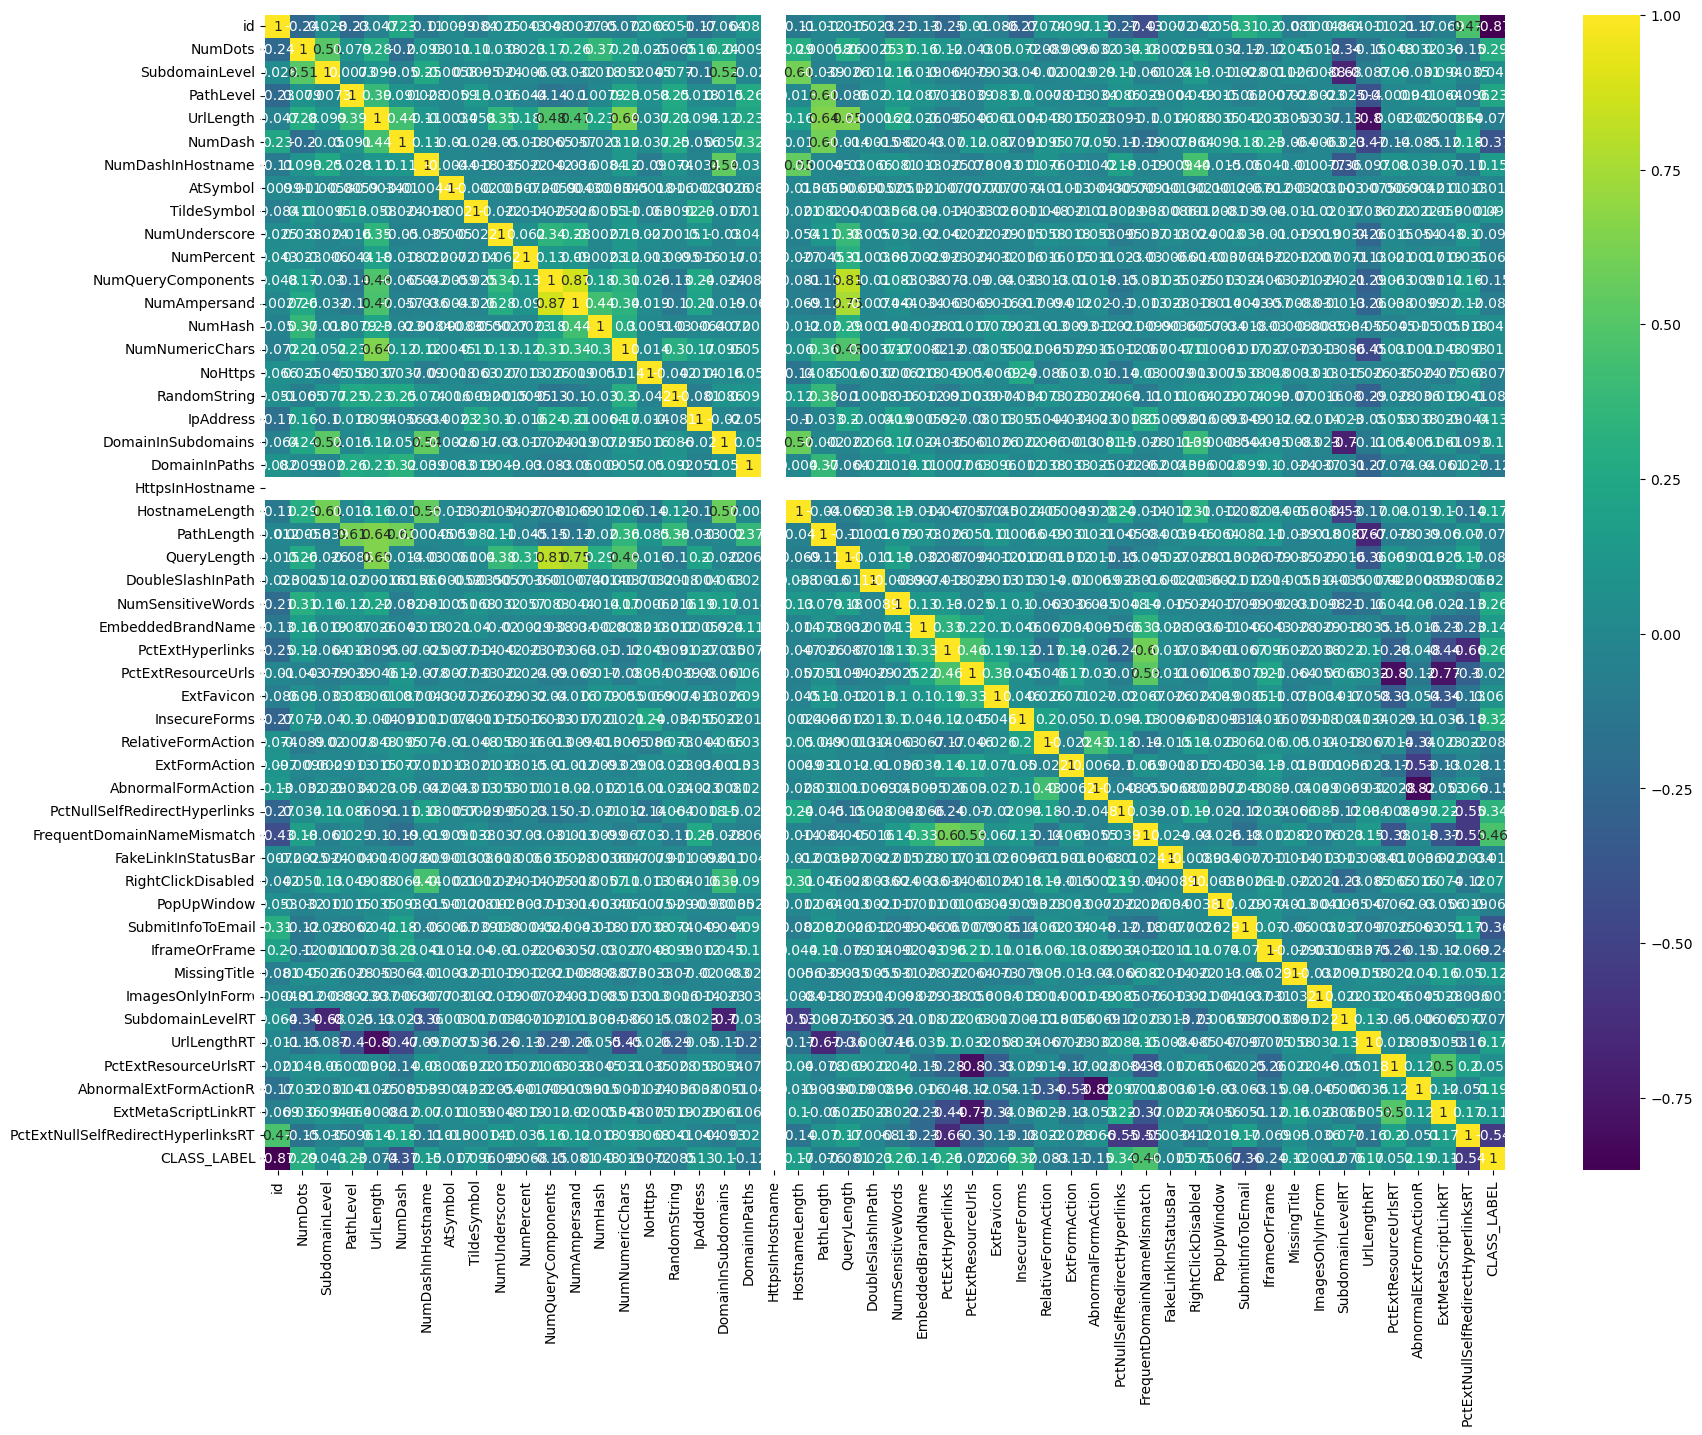

In [18]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), cmap= "viridis", linecolor="white", annot=True)

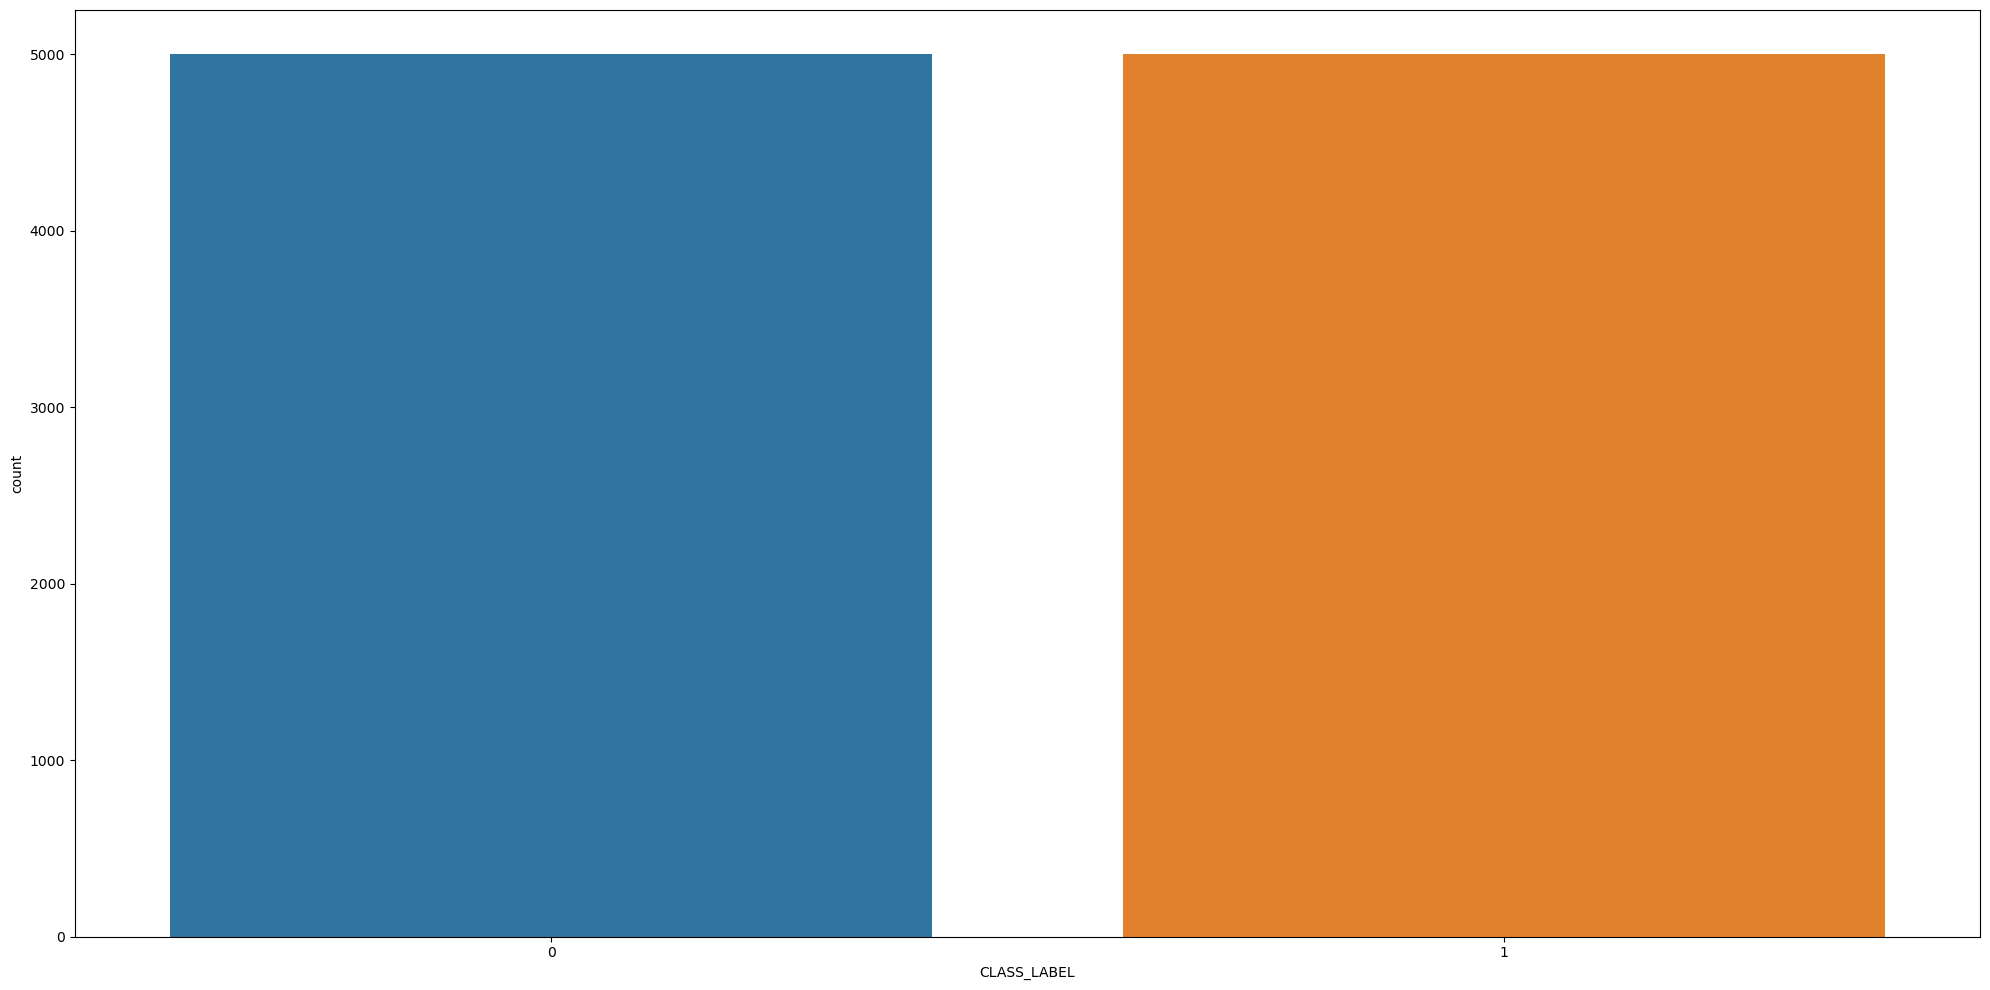

In [19]:
# Plot of the target

plt.figure(figsize=(20, 10))
sns.countplot(x = 'CLASS_LABEL', data = df)
plt.tight_layout()

In [20]:
# Separating the features and output

X = df.drop("CLASS_LABEL", axis=1)
y = df["CLASS_LABEL"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state=45)
X.head()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,NumQueryComponents,NumAmpersand,NumHash,NumNumericChars,NoHttps,RandomString,IpAddress,DomainInSubdomains,DomainInPaths,HttpsInHostname,HostnameLength,PathLength,QueryLength,DoubleSlashInPath,NumSensitiveWords,EmbeddedBrandName,PctExtHyperlinks,PctExtResourceUrls,ExtFavicon,InsecureForms,RelativeFormAction,ExtFormAction,AbnormalFormAction,PctNullSelfRedirectHyperlinks,FrequentDomainNameMismatch,FakeLinkInStatusBar,RightClickDisabled,PopUpWindow,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT
0,1,3,1,5,72,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,21,44,0,0,0,0,0.000,0.250000,1,1,0,0,0,0.0,0,0,0,0,0,0,0,1,1,0,1,1,-1,1
1,2,3,1,3,144,0,0,0,0,2,0,2,1,0,41,1,0,0,0,0,0,17,16,103,0,1,0,0.000,0.000000,0,1,0,0,0,0.0,0,0,0,0,0,0,0,0,1,-1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,27,24,0,0,0,0,0.375,1.000000,1,1,0,0,0,0.0,0,0,0,0,0,0,0,0,1,0,-1,1,-1,0
3,4,3,1,6,79,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,22,50,0,0,0,1,1.000,0.095238,1,1,0,0,0,0.0,1,0,0,0,1,0,0,0,1,-1,1,1,1,-1
4,5,3,0,4,46,0,0,0,0,0,0,0,0,0,2,1,1,0,0,1,0,10,29,0,0,0,0,1.000,1.000000,0,0,0,1,0,0.0,1,0,0,0,0,1,0,0,1,1,-1,0,-1,-1


In [21]:
print(y_test.shape)
print(y_train.shape)
print(X_train.shape)
print(X_test.shape)

(2000,)
(8000,)
(8000, 49)
(2000, 49)


In [22]:
from sklearn.metrics import *
from sklearn.preprocessing import *

In [23]:
minmax = MinMaxScaler()
minmax.fit(X_train)
X_train = minmax.transform(X_train)
X_test = minmax.transform(X_test)

In [24]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train, y_train)
predictionss = model.predict(X_test)
print(" ======== Accuracy Score ======== ")
print(" ")
print(f"{accuracy_score(y_test, predictionss)} or {round(accuracy_score(y_test, predictionss) * 100, 1)}%")
print(" ")
print(" ======== Confustion Matrix ======== ")
print(" ")
print(confusion_matrix(y_test, predictionss))
print(" ")
print(" ======== Classification Report ======== ")
print(" ")
print(classification_report(y_test, predictionss))



 ======== Accuracy Score ======== 
 
0.885 or 88.5%
 
 ======== Confustion Matrix ======== 
 
[[973  37]
 [193 797]]
 
 ======== Classification Report ======== 
 
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1010
           1       0.96      0.81      0.87       990

    accuracy                           0.89      2000
   macro avg       0.90      0.88      0.88      2000
weighted avg       0.89      0.89      0.88      2000



In [25]:
import pickle 

with open('model', 'wb') as files:
    pickle.dump(model, files)

In [26]:
# with open('model_pkl' , 'rb') as f:
#     lr = pickle.load(f)